In [6]:
import pandas as pd
import numpy as np
import os
import string
import glob
import random
import cmath
import math

In [7]:
Dimen=1000
Ngram=3

## Loading Data

In [8]:
LangLabels = ['bul', 'ces', 'dan', 'nld', 'deu', 'eng', 'est', 'fin', 'fra', 'ell', 'hun', 'ita',
              'lav', 'lit', 'pol', 'por', 'ron', 'slk', 'slv', 'spa', 'swe']
Traindata=[]
Trainlabel=[]
for i, Label in enumerate(LangLabels):
    FilePath = os.path.join('language','training_texts',"{}.txt".format(Label))
    with open(FilePath,'r', encoding='utf-8') as f:
        inputseq=f.read()
    senlist=inputseq.split('\n')
    for data in senlist:
        Traindata.append(data)
        Trainlabel.append(i)
print("{} sentences have been loaded for train".format(str(len(Traindata))))

210080 sentences have been loaded for train


In [9]:
ShortLangLabels = ['bg', 'cs', 'da', 'nl', 'de', 'en', 'et', 'fi', 'fr', 'el', 'hu', 'it', 'lv', 'lt', 'pl', 'pt', 'ro', 'sk', 'sl', 'es', 'sv']
Testdata=[]
Testlabel=[]
mp = dict()
for i,key in enumerate(ShortLangLabels):
    mp[key] = i
TestFilePathList = glob.glob(os.path.join("language", "testing_texts", "*.txt"))
for i, TestFilePath in enumerate(TestFilePathList):
    (_, TestFileName) = os.path.split(TestFilePath)
    if not mp.__contains__(TestFileName[0:2]):
        continue
    Label = mp[TestFileName[0:2]]
    with open(TestFilePath,'r',encoding='utf-8') as f:
        InputSequence = f.read()
    Testdata.append(InputSequence[:-1]) 
    Testlabel.append(Label)
print("{} sentences have been loaded for test.".format(str(len(Testdata))))

21000 sentences have been loaded for test.


## Polar

In [25]:
K=21
IM = dict() 
AM = dict()
IAM = dict()
LangLabels = []
for key in range(K):
    AM[key] = np.zeros(Dimen)
    LangLabels.append(key)

def GenerateHV():
    real_part = np.random.uniform(low=-1, high=1, size=Dimen)
    complex_part = np.random.uniform(low=-1, high=1, size=Dimen)
    RandomHV = real_part + 1j * complex_part
    RandomHV = [cmath.phase(i) for i in RandomHV]
    return RandomHV

def CalculateNormalSimilarity(vector1, vector2):
     return np.dot(vector1, vector2)

def LookupIM(Key):
    if not IM.__contains__(Key):
        IM[Key] = GenerateHV();
    return IM[Key]

def NGramEncoding(InputSequence):
    block = np.zeros([Ngram, Dimen])
    sumHV = np.zeros(Dimen)
    for i, Key in enumerate(InputSequence):
        block = np.roll(block, (1, 1), (0, 1))
        block[0] = LookupIM(Key)
        if i >= Ngram - 1:
            NGramHV = block[0]
            for j in range(1, Ngram):
                NGramHV = NGramHV * block[j]
            sumHV += np.multiply(2,NGramHV)    #//////////////////////////
    return sumHV

def Normalization(vector):
    vector /= np.linalg.norm(vector)   #//////////////////////
    return vector

length = len(Traindata)
for i in range(length):
    Data = Traindata[i]
    Label = Trainlabel[i]
    tmp = NGramEncoding(Data)
    AM[Label] = AM[Label] + tmp
for Label in LangLabels:
    IAM[Label] = AM[Label]
    AM[Label] = Normalization(AM[Label])
    
length = len(Testdata)
predict = []
for i in range(length):
    Data = Testdata[i]
    TestHV = Normalization(NGramEncoding(Data))
    maxAngle = -1
    predicLang = -1
    for j,LangLabel in enumerate(LangLabels):
        angle = CalculateNormalSimilarity(AM[LangLabel], TestHV)
        if angle > maxAngle:
            maxAngle = angle
            predicLang = LangLabel
    predict.append(predicLang)

In [26]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
print("Accuracy score: ",accuracy_score(Testlabel,predict))

Accuracy score:  0.9582857142857143


In [27]:
f1_macro=f1_score(Testlabel,predict, average='macro')
f1_micro=f1_score(Testlabel,predict, average='micro')
f1_weighted=f1_score(Testlabel,predict, average='weighted')
f1_none=f1_score(Testlabel,predict, average=None)
print("F1 score with macro average: ",f1_macro)
print("F1 score with micro average: ",f1_micro)
print("F1 score with weighted average: ",f1_weighted)
print("F1 score with no average: ",f1_none)

F1 score with macro average:  0.9581603931273108
F1 score with micro average:  0.9582857142857143
F1 score with weighted average:  0.9581603931273107
F1 score with no average:  [0.96296296 0.87401575 0.96080402 0.96051333 0.98101898 0.97788945
 0.97188755 0.97987928 0.96936759 0.97412935 0.98840141 0.96735905
 0.95673794 0.95682731 0.96469418 0.96351085 0.97313433 0.86221294
 0.95134062 0.95431472 0.97036665]


Text(0.5, 155.72222222222217, 'Predicted')

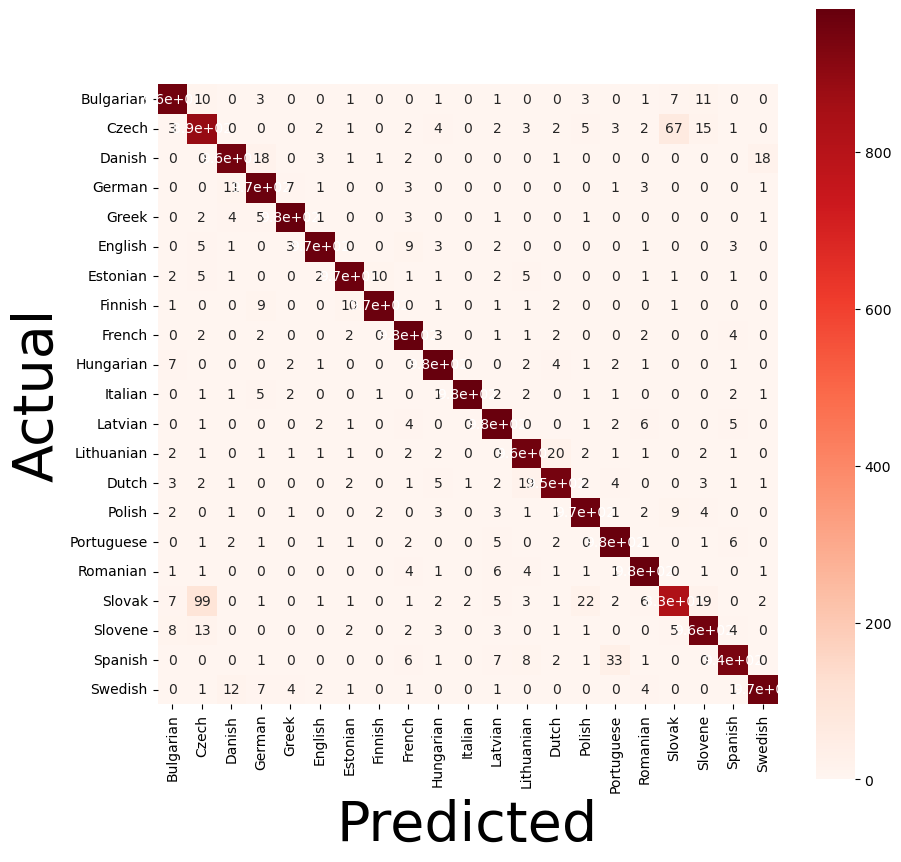

In [28]:
Labelss=['Bulgarian', 'Czech', 'Danish','German', 'Greek', 'English', 'Estonian', 'Finnish', 'French', 'Hungarian', 'Italian', 'Latvian',
         'Lithuanian', 'Dutch','Polish', 'Portuguese', 'Romanian', 'Slovak', 'Slovene', 'Spanish', 'Swedish']
cm = confusion_matrix(Testlabel,predict)
plt.figure(figsize=(10, 10))
ax = sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, square=True, xticklabels=Labelss, yticklabels=Labelss)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

## Cartesian

In [18]:
#Cartesian
K=21
IM = dict() 
AM = dict()
IAM = dict()
LangLabels = []
for key in range(K):
    AM[key] = np.zeros(Dimen)
    LangLabels.append(key)

def GenerateHV():
    real_part = np.random.uniform(low=-1, high=1, size=Dimen)
    complex_part = np.random.uniform(low=-1, high=1, size=Dimen)
    RandomHV = real_part + 1j * complex_part
    return RandomHV

def CalculateCosineSimilarity(vector1, vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)

    norm1 = np.sqrt(np.dot(vector1, np.conjugate(vector1)))
    norm2 = np.sqrt(np.dot(vector2, np.conjugate(vector2)))
    return np.real(np.dot(vector1, np.conjugate(vector2)) / (norm1*norm2))

def LookupIM(Key):
    if not IM.__contains__(Key):
        IM[Key] = GenerateHV();
    return IM[Key]

def NGramEncoding(InputSequence):
    block = np.zeros([Ngram, Dimen])
    sumHV = np.zeros(Dimen)
    for i, Key in enumerate(InputSequence):
        block = np.roll(block, (1, 1), (0, 1))
        block[0] = LookupIM(Key)
        if i >= Ngram - 1:
            NGramHV = block[0]
            for j in range(1, Ngram):
                NGramHV = NGramHV * block[j]
            sumHV = sumHV + NGramHV
    return sumHV

def Normalization(vector):
    return vector / np.sqrt(np.dot(vector, np.conjugate(vector)))


length = len(Traindata)
for i in range(length):
    Data = Traindata[i]
    Label = Trainlabel[i]
    tmp = NGramEncoding(Data)
    AM[Label] = AM[Label] + tmp
for Label in LangLabels:
    IAM[Label] = AM[Label]
    AM[Label] = Normalization(AM[Label])


C:\Users\mdasi\AppData\Local\Temp\ipykernel_15404\1210588204.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  block[0] = LookupIM(Key)


In [19]:
length = len(Testdata)
predict = []
for i in range(length):
    Data = Testdata[i]
    TestHV = Normalization(NGramEncoding(Data))
    maxAngle = -1
    predicLang = -1
    for j,LangLabel in enumerate(LangLabels):
        angle = CalculateCosineSimilarity(AM[LangLabel], TestHV)
        if angle > maxAngle:
            maxAngle = angle
            predicLang = LangLabel
    predict.append(predicLang)

C:\Users\mdasi\AppData\Local\Temp\ipykernel_15404\1210588204.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  block[0] = LookupIM(Key)


In [20]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
print("Accuracy score: ",accuracy_score(Testlabel,predict))

Accuracy score:  0.9601428571428572


In [21]:
f1_macro=f1_score(Testlabel,predict, average='macro')
f1_micro=f1_score(Testlabel,predict, average='micro')
f1_weighted=f1_score(Testlabel,predict, average='weighted')
f1_none=f1_score(Testlabel,predict, average=None)
print("F1 score with macro average: ",f1_macro)
print("F1 score with micro average: ",f1_micro)
print("F1 score with weighted average: ",f1_weighted)
print("F1 score with no average: ",f1_none)

F1 score with macro average:  0.9600127532998434
F1 score with micro average:  0.9601428571428572
F1 score with weighted average:  0.9600127532998435
F1 score with no average:  [0.96047431 0.87016169 0.96534405 0.96479921 0.97848924 0.98147221
 0.97142857 0.98495486 0.97777778 0.97859632 0.98594378 0.98261302
 0.9553437  0.95979899 0.9617866  0.96571988 0.9825784  0.85283411
 0.94811083 0.96179317 0.9702471 ]


Text(0.5, 155.72222222222217, 'Predicted')

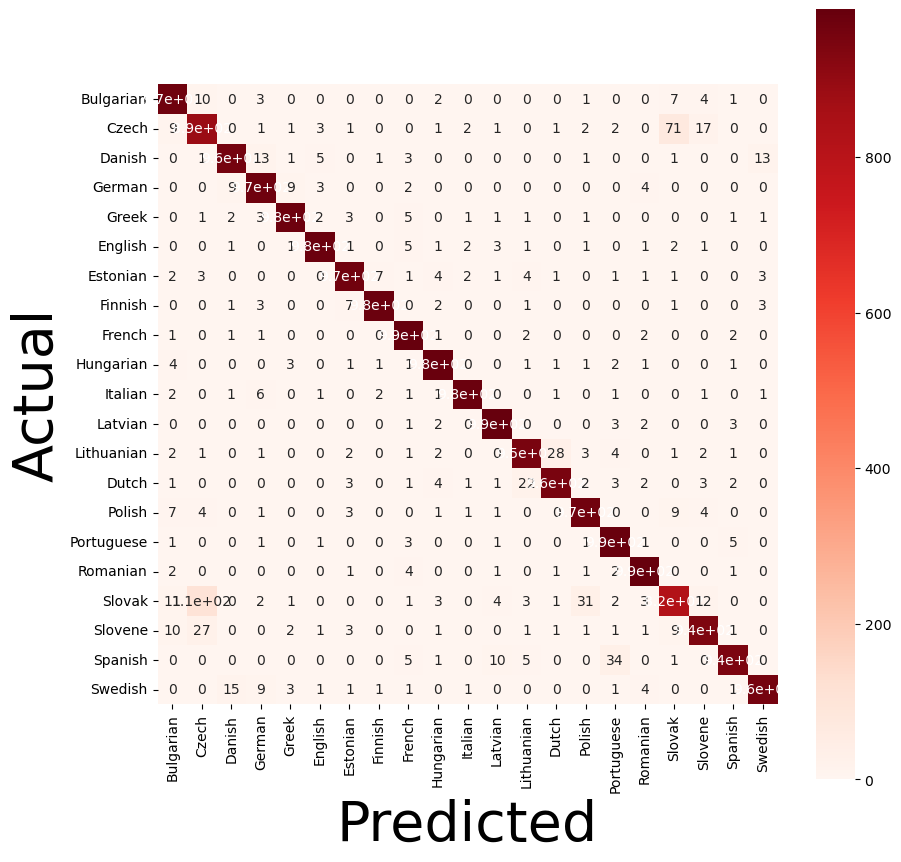

In [22]:
Labelss=['Bulgarian', 'Czech', 'Danish','German', 'Greek', 'English', 'Estonian', 'Finnish', 'French', 'Hungarian', 'Italian', 'Latvian',
         'Lithuanian', 'Dutch','Polish', 'Portuguese', 'Romanian', 'Slovak', 'Slovene', 'Spanish', 'Swedish']
cm = confusion_matrix(Testlabel,predict)
plt.figure(figsize=(10, 10))
ax = sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, square=True, xticklabels=Labelss, yticklabels=Labelss)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)